# Introduction

    The purpose of this project is to use NBA statistics from 1950-2017 to predict NBA player's salary.
    
    We will determine which players are being underpaid, and which players are being overpaid.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set()

In [2]:
# Import Data from https://www.kaggle.com/whitefero/nba-players-advanced-season-stats-19782016?select=NBA+Players+-+Advanced+Season+Stats+%281978-2016%29.xlsx
df_1950_2017 = pd.read_csv('1950-2017NBAStats.csv').drop(['#','blanl','blank2'],axis = 1)[:-1]
df_salary_cap = pd.read_csv('NBASalaryCapData.csv')
df_win_tots = pd.read_csv('NBAWinTotals.csv')


In [3]:
df_1950_2017['Season Start'] = df_1950_2017['Season Start'].astype(int)

In [4]:
# Remove null values
df_win_tots.dropna(inplace = True)
df_win_tots

,Rk,Season,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
0,1.0,2020.0,37.0,35.0,44.0,28.0,33.0,21.0,39.0,44.0,...,21.0,21.0,47.0,48.0,39.0,29.0,32.0,27.0,50.0,32.0
1,2.0,2019.0,20.0,48.0,35.0,22.0,23.0,19.0,43.0,46.0,...,44.0,33.0,43.0,34.0,35.0,31.0,32.0,53.0,44.0,25.0
2,3.0,2018.0,29.0,49.0,42.0,22.0,39.0,19.0,33.0,54.0,...,49.0,42.0,51.0,19.0,53.0,39.0,48.0,58.0,50.0,32.0
3,4.0,2017.0,24.0,55.0,28.0,27.0,36.0,50.0,24.0,46.0,...,48.0,25.0,52.0,21.0,49.0,27.0,47.0,59.0,48.0,43.0
4,5.0,2016.0,43.0,53.0,20.0,41.0,36.0,51.0,33.0,40.0,...,47.0,29.0,28.0,24.0,41.0,32.0,61.0,51.0,51.0,49.0
5,6.0,2015.0,48.0,48.0,21.0,42.0,48.0,57.0,42.0,33.0,...,55.0,35.0,10.0,23.0,44.0,33.0,67.0,56.0,40.0,41.0
6,7.0,2014.0,60.0,40.0,38.0,50.0,33.0,53.0,50.0,30.0,...,45.0,25.0,18.0,39.0,51.0,29.0,55.0,49.0,38.0,46.0
7,8.0,2013.0,38.0,25.0,44.0,48.0,43.0,33.0,49.0,36.0,...,59.0,23.0,19.0,48.0,54.0,28.0,62.0,48.0,25.0,44.0
8,9.0,2012.0,44.0,41.0,49.0,45.0,21.0,24.0,41.0,57.0,...,60.0,20.0,34.0,25.0,33.0,28.0,58.0,34.0,43.0,29.0
9,10.0,2011.0,40.0,39.0,22.0,50.0,7.0,21.0,36.0,38.0,...,47.0,37.0,35.0,33.0,28.0,22.0,50.0,23.0,36.0,20.0


In [5]:
# Create a dictionary of salary cap info
s_cap_dic = pd.Series(df_salary_cap['Salary Cap'].values,index=df_salary_cap['Start of Season']).to_dict()
s_cap_dic

{1984: '$3,600,000 ',
 1985: '$4,233,000 ',
 1986: '$4,945,000 ',
 1987: '$6,164,000 ',
 1988: '$7,232,000 ',
 1989: '$9,802,000 ',
 1990: '$11,871,000 ',
 1991: '$12,500,000 ',
 1992: '$14,000,000 ',
 1993: '$15,175,000 ',
 1994: '$15,964,000 ',
 1995: '$23,000,000 ',
 1996: '$24,363,000 ',
 1997: '$26,900,000 ',
 1998: '$30,000,000 ',
 1999: '$34,000,000 ',
 2000: '$35,500,000 ',
 2001: '$42,500,000 ',
 2002: '$40,271,000 ',
 2003: '$43,840,000 ',
 2004: '$43,870,000 ',
 2005: '$49,500,000 ',
 2006: '$53,135,000 ',
 2007: '$55,630,000 ',
 2008: '$58,680,000 ',
 2009: '$57,700,000 ',
 2010: '$58,044,000 ',
 2011: '$58,044,000 ',
 2012: '$58,044,000 ',
 2013: '$58,679,000 ',
 2014: '$63,065,000 ',
 2015: '$70,000,000 ',
 2016: '$94,143,000 ',
 2017: '$99,093,000 ',
 2018: '$101,869,000 ',
 2019: '$109,140,000 ',
 2020: '$109,140,000 '}

In [6]:
# Create a Salary Cap column from the dictionary
df_1950_2017['Salary Cap'] = df_1950_2017['Season Start'].map(s_cap_dic)

In [7]:
# Standard Data Cleaning
df_1950_2017['Player Salary'] = df_1950_2017[' Player Salary in $ ']
df_1950_2017 = df_1950_2017.drop([' Player Salary in $ '],axis = 1)
df_1950_2017.dropna(subset = ['Player Salary'],inplace = True)
df_1950_2017['Salary Cap'] = df_1950_2017['Salary Cap'].str.replace('$','')
df_1950_2017['Salary Cap'] = df_1950_2017['Salary Cap'].str.replace(',','')
df_1950_2017['Player Salary'] = df_1950_2017['Player Salary'].str.replace('$','')
df_1950_2017['Player Salary'] = df_1950_2017['Player Salary'].str.replace(',','')
df_1950_2017['Salary Cap'] = df_1950_2017['Salary Cap'].astype(float,)
df_1950_2017['Player Salary'] = df_1950_2017['Player Salary'].astype(float)
df_1950_2017['%SalaryCap'] = df_1950_2017['Player Salary']/df_1950_2017['Salary Cap']
df_1950_2017.dropna(inplace = True)

In [8]:
# We will look create a dataframe from 2000-2017
df_00_17 = df_1950_2017[df_1950_2017['Season Start'] > 2000]

In [9]:
df_00_17['PTS'] = df_00_17['PTS']/df_00_17['G']
df_00_17['TOV'] = df_00_17['TOV']/df_00_17['G']

<ipython-input-9-10dbb8545cef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_17['PTS'] = df_00_17['PTS']/df_00_17['G']
<ipython-input-9-10dbb8545cef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_17['TOV'] = df_00_17['TOV']/df_00_17['G']


In [10]:
# More Data Cleaning
df_00_17['TS%'] = df_00_17['TS%'].str.replace('%',' ').astype(float)
df_00_17['FTr'] = df_00_17['FTr'].str.replace('%',' ').astype(float)
df_00_17['FG%'] = df_00_17['FG%'].str.replace('%',' ').astype(float)
df_00_17['2P%'] = df_00_17['2P%'].str.replace('%',' ').astype(float)
df_00_17['eFG%'] = df_00_17['eFG%'].str.replace('%',' ').astype(float)
df_00_17['FT%'] = df_00_17['FT%'].str.replace('%',' ').astype(float)

<ipython-input-10-f12121e3ece4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_17['TS%'] = df_00_17['TS%'].str.replace('%',' ').astype(float)
<ipython-input-10-f12121e3ece4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_17['FTr'] = df_00_17['FTr'].str.replace('%',' ').astype(float)
<ipython-input-10-f12121e3ece4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [11]:
# Use the groupby function to Aggregate by seasons
agg_df = df_00_17.groupby('Season Start',as_index=False).agg(np.mean)
agg_df['Player Salary'].describe()

count    1.700000e+01
mean     5.103403e+06
std      8.611395e+05
min      3.900155e+06
25%      4.643654e+06
50%      5.095503e+06
75%      5.251432e+06
max      7.412623e+06
Name: Player Salary, dtype: float64

Text(0, 0.5, 'Salary in Millions $')

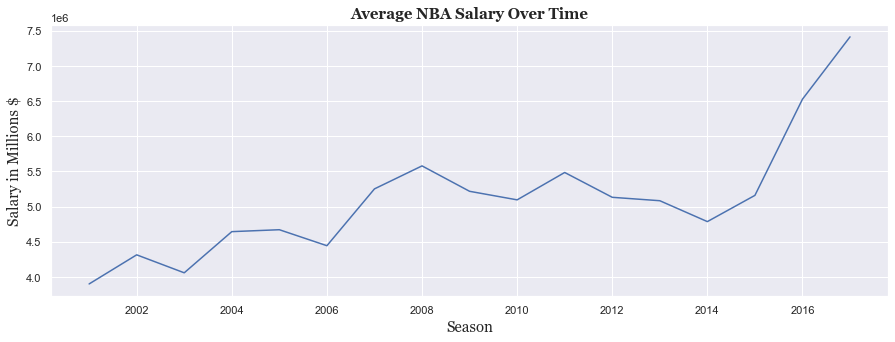

In [12]:
# Plot Average NBA Salary over Time
font = {'fontname': 'Georgia'}
plt.figure(figsize = (15,5))
plt.title('Average NBA Salary Over Time',**font,fontsize = 15,fontweight = 'bold')
plt.plot(agg_df['Season Start'],agg_df['Player Salary'])
plt.xlabel('Season',**font,fontsize = 15)
plt.ylabel('Salary in Millions $',**font,fontsize = 15)



# Lets explore the factors that contribute to salary

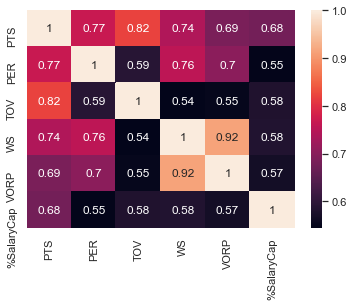

In [13]:
# Create a correlation heatmap to see what features are important to %SalaryCap
cols = ['PTS','PER','TOV','WS','VORP','%SalaryCap']
sns.heatmap(df_00_17[cols].corr(method = 'pearson'),annot = True)

In [14]:
# Import necessary libraries for Machine Learning Workflow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import math
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor






In [15]:
# Train Test Split
X = df_00_17[['PTS','PER','TOV','WS','VORP']]
y = df_00_17['%SalaryCap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [16]:
# Linear Regression Attempt
LR = LinearRegression()

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print(LR.score(X_test,y_test))

0.46560583919343335


In [17]:
# Random Foreset Regression Attempt
RF = RandomForestRegressor()

RF.fit(X_train,y_train)
y_pred1 = RF.predict(X_test)
print(RF.score(X_test,y_test))

0.43830813363996435


In [18]:
MSE = sklearn.metrics.mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.06136178594353527

In [19]:
# Create a pipeline 
model = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators= 800,min_samples_split=10,min_samples_leaf=4,max_features='sqrt',max_depth=20,bootstrap=True,random_state = 40))
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("MSE:", metrics.mean_squared_error(y_test,pred))

MSE: 0.0037114513363305846


In [20]:
# See what types of parameters we can tune for the Random Forest Algorithm
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'randomforestregressor', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_impurity_split', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregressor__warm_start'])

# Cross Validation to get model parameters

In [21]:
# Use Randomized Search Cross Validation for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

Num_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
max_depth = [10,20,30,40,50,60,70,80,90,100,None]
bootstrap = [True, False]
max_features = ['auto','sqrt','log2']
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]




parameters = {'randomforestregressor__max_features': max_features, 'randomforestregressor__n_estimators': Num_estimators,'randomforestregressor__bootstrap': bootstrap,'randomforestregressor__max_depth': max_depth,'randomforestregressor__min_samples_leaf':min_samples_leaf,'randomforestregressor__min_samples_split': min_samples_split }
#Cross Validation

# Uncomment .fit to implement, it's commented out for runtime purposes
rf_clf = RandomizedSearchCV(model, parameters,verbose = 1,n_jobs = -1,cv = 5,random_state=40).fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


# Uncomment .fit above to implement, it's commented out for runtime purposes

In [22]:
# Obtain Optimal Parameters
rf_clf.best_params_

{'randomforestregressor__n_estimators': 800,
 'randomforestregressor__min_samples_split': 10,
 'randomforestregressor__min_samples_leaf': 4,
 'randomforestregressor__max_features': 'sqrt',
 'randomforestregressor__max_depth': 20,
 'randomforestregressor__bootstrap': True}

In [23]:
df_00_17

,Season Start,Player Name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Salary Cap,Player Salary,%SalaryCap
21,2001,A.J. Guyton,PG,22.0,CHI,33.0,8.0,630.0,10.3,49.5,...,36.0,64.0,9.0,5.0,0.727273,35.0,6.000000,42500000.0,465850.0,0.010961
22,2002,A.J. Guyton,PG,23.0,CHI,45.0,6.0,607.0,11.8,47.7,...,44.0,81.0,10.0,7.0,0.822222,23.0,5.422222,40271000.0,18748.0,0.000466
24,2017,A.J. Hammons,C,24.0,DAL,22.0,0.0,163.0,8.4,47.2,...,36.0,4.0,1.0,13.0,0.454545,21.0,2.181818,99093000.0,1312611.0,0.013246
25,2010,A.J. Price,PG,23.0,IND,56.0,2.0,865.0,14.0,53.0,...,88.0,106.0,35.0,3.0,1.053571,53.0,7.321429,58044000.0,762195.0,0.013131
26,2011,A.J. Price,PG,24.0,IND,50.0,0.0,795.0,10.7,45.4,...,72.0,111.0,29.0,1.0,1.060000,61.0,6.460000,58044000.0,854389.0,0.014720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,2005,Zydrunas Ilgauskas,C,29.0,CLE,78.0,78.0,2615.0,19.5,55.0,...,672.0,100.0,53.0,165.0,2.448718,313.0,16.923077,49500000.0,8740000.0,0.176566
24618,2006,Zydrunas Ilgauskas,C,30.0,CLE,78.0,78.0,2283.0,21.9,57.6,...,591.0,91.0,38.0,136.0,1.987179,280.0,15.602564,53135000.0,9442697.0,0.177711
24619,2007,Zydrunas Ilgauskas,C,31.0,CLE,78.0,78.0,2130.0,18.0,52.7,...,599.0,123.0,48.0,98.0,1.807692,257.0,11.858974,55630000.0,10142156.0,0.182315
24620,2008,Zydrunas Ilgauskas,C,32.0,CLE,73.0,73.0,2222.0,18.7,52.2,...,682.0,104.0,34.0,120.0,1.849315,247.0,14.095890,58680000.0,10841615.0,0.184758


In [24]:
# Obtain Predictions
df_00_17_predictions = model.predict(df_00_17[['PTS','PER','TOV','WS','VORP']])
df_00_17_predictions

array([0.02978537, 0.02406354, 0.02078648, ..., 0.13941894, 0.16166186,
       0.13429329])

In [25]:
# Create a Predicted Salary Cap% column and calculate the residuals
df_00_17['PredictedSalaryCap%'] = df_00_17_predictions
df_00_17['Residuals'] = df_00_17['%SalaryCap'] - df_00_17['PredictedSalaryCap%']

<ipython-input-25-670fa5c9246e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_17['PredictedSalaryCap%'] = df_00_17_predictions
<ipython-input-25-670fa5c9246e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_00_17['Residuals'] = df_00_17['%SalaryCap'] - df_00_17['PredictedSalaryCap%']


In [26]:
# 10 Most Undervalued Players seasons from 2000-2017
df_00_17.sort_values('Residuals',ascending = True).head(10)

,Season Start,Player Name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,PTS,Salary Cap,Player Salary,%SalaryCap,PredictedSalaryCap%,Residuals
13477,2017,Karl-Anthony Towns,C,21.0,MIN,82.0,82.0,3030.0,26.0,61.8,...,57.0,103.0,2.585366,241.0,25.134146,99093000.0,6216840.0,0.062737,0.304018,-0.241281
18437,2001,Paul Pierce,SF,23.0,BOS,82.0,82.0,3120.0,22.3,56.3,...,138.0,69.0,3.195122,251.0,25.256098,42500000.0,2051271.0,0.048265,0.289314,-0.241049
10108,2017,Isaiah Thomas,PG,27.0,BOS,76.0,76.0,2569.0,26.5,62.5,...,70.0,13.0,2.763158,167.0,28.934211,99093000.0,6261395.0,0.063187,0.289882,-0.226695
17865,2017,Nikola Jokic,C,21.0,DEN,73.0,59.0,2038.0,26.4,64.0,...,61.0,56.0,2.342466,214.0,16.726027,99093000.0,1471382.0,0.014848,0.233314,-0.218466
6747,2001,Dirk Nowitzki,PF,22.0,DAL,82.0,82.0,3125.0,22.8,60.1,...,79.0,101.0,1.902439,245.0,21.756098,42500000.0,2157595.0,0.050767,0.262136,-0.211369
14936,2005,LeBron James,SF,20.0,CLE,80.0,80.0,3388.0,25.7,55.4,...,177.0,52.0,3.275000,146.0,27.187500,49500000.0,4621800.0,0.093370,0.289024,-0.195654
3315,2016,C.J. McCollum,SG,24.0,POR,80.0,80.0,2780.0,17.7,54.4,...,97.0,23.0,2.450000,187.0,20.825000,94143000.0,3219579.0,0.034199,0.215562,-0.181363
4245,2008,Chris Paul,PG,22.0,NOH,80.0,80.0,3006.0,28.3,57.6,...,217.0,4.0,2.512500,185.0,21.050000,58680000.0,4574189.0,0.077951,0.259063,-0.181111
16758,2002,Michael Jordan*,SF,38.0,WAS,60.0,53.0,2093.0,20.7,46.8,...,85.0,26.0,2.700000,119.0,22.916667,40271000.0,1030000.0,0.025577,0.202283,-0.176706
23717,2001,Vince Carter,SF,24.0,TOR,75.0,75.0,2979.0,25.0,55.1,...,114.0,82.0,2.226667,205.0,27.600000,42500000.0,3073032.0,0.072307,0.233359,-0.161052


In [33]:
# 10 Most Overvalued Player seasons from 2000-2017
df_00_17.sort_values('Residuals',ascending = False).head(15)

,Season Start,Player Name,Pos,Age,Tm,G,GS,MP,PER,TS%,...,STL,BLK,TOV,PF,PTS,Salary Cap,Player Salary,%SalaryCap,PredictedSalaryCap%,Residuals
588,2002,Alonzo Mourning*,C,31.0,MIA,75.0,74.0,2455.0,18.9,55.8,...,27.0,186.0,2.426667,258.0,15.706667,40271000.0,20629800.0,0.512274,0.164773,0.347502
13392,2002,Juwan Howard,PF,28.0,DAL,53.0,44.0,1659.0,15.1,51.1,...,28.0,30.0,1.471698,170.0,12.905660,40271000.0,20625000.0,0.512155,0.170054,0.342101
13391,2002,Juwan Howard,PF,28.0,TOT,81.0,72.0,2635.0,15.8,51.3,...,46.0,47.0,1.876543,265.0,14.629630,40271000.0,20625000.0,0.512155,0.195977,0.316178
13992,2002,Kevin Garnett,PF,25.0,MIN,81.0,81.0,3175.0,23.8,53.6,...,96.0,126.0,2.827160,184.0,21.160494,40271000.0,25200000.0,0.625760,0.330058,0.295702
13390,2001,Juwan Howard,PF,27.0,DAL,27.0,27.0,993.0,16.6,53.8,...,29.0,16.0,2.703704,106.0,17.814815,42500000.0,18750000.0,0.441176,0.145607,0.295570
587,2001,Alonzo Mourning*,C,30.0,MIA,13.0,3.0,306.0,24.6,53.6,...,4.0,31.0,2.153846,24.0,13.615385,42500000.0,18754800.0,0.441289,0.151412,0.289877
21347,2003,Shawn Kemp,C,33.0,ORL,79.0,55.0,1633.0,11.7,46.8,...,66.0,33.0,1.291139,239.0,6.797468,43840000.0,14941935.0,0.340829,0.053504,0.287325
13388,2001,Juwan Howard,PF,27.0,TOT,81.0,81.0,2974.0,16.0,52.7,...,75.0,37.0,2.987654,292.0,18.049383,42500000.0,18750000.0,0.441176,0.158479,0.282697
13393,2002,Juwan Howard,PF,28.0,DEN,28.0,28.0,976.0,17.1,51.5,...,18.0,17.0,2.642857,95.0,17.892857,40271000.0,20625000.0,0.512155,0.229801,0.282354
13993,2003,Kevin Garnett,PF,26.0,MIN,82.0,82.0,3321.0,26.4,55.3,...,113.0,129.0,2.792683,199.0,22.963415,43840000.0,28000000.0,0.638686,0.357694,0.280992
